# Visualizando a Poesia de Belchior

Projeto final da disciplina Visualização Científica, ministrada pela professora Emanuele Santos. 

**Lucas Cabral** <br>
Universidade Federal do Ceará, Mestrado e Doutorado em Ciências da Computação<br>
2019.2

![Belchior](https://www.urbanarts.com.br/imagens/produtos/123739/0/Ampliada/amar-e-mudar-as-coisas.jpg)
*Arte: [Daniel Brandão](https://www.estudiodanielbrandao.com/)*

Antonio Carlos Belchior, mais conhecido como Belchior (Sobral, 26 de outubro de 1946 – Santa Cruz do Sul, 30 de abril de 2017), foi um compositor cearense entre os mais notórios do cancioneiro popular brasileiro.  Dono de uma obra de grande densidade e complexidade estética, literária e filosófica, suas ricas composições são objeto de estudo acadêmico e um marco da cultura cearense. Este trabalho propõe uma análise de suas composições através de técnicas de processamento de linguagem natural e de visualização de dados. Dado a riqueza poético e musica das composições de Belchior, este trabalho não tem a pretenção de realizar uma análise literária ou linguística aprofundada, mas sim, movido por curiosidade e admiração, utilizar ferramentas computacionacias para explorar os padrões sintáticos e estatísticos que permeiam o conjunto de sua obra. Nos interessa saber:

- Qual a distribuição do tamanho das letras das músicas?
- Quais os termos mais relevantes na obra toda? E por música?
- Quais letras possuem maior similaridade? 
- Qual a polaridade de sentimento e o nível de subjetividade dominante na obra? E por música? 
- Quais são as palavras que mais ocorrem juntas? 

Vamos ver o que conseguimos descobrir!  

# Sobre os dados
As letras foram extraídas do site [Letras](https://www.letras.mus.br/) através de um [web-crawler](https://github.com/cabrau/datavis-course/blob/master/projeto_final/scrapping_lyrics.ipynb). Dando como input o nome do artista, o web-crawler percorre a lista de todas as músicas do artista, armazenando em uma tabela o título da música, se é uma das mais tocadas e a letra, descartando músicas cuja composição não seja do artista escolhido.

Após essa coleta, os dados passaram por uma etapa de [extração de features](https://github.com/cabrau/datavis-course/blob/master/projeto_final/pre_processing_text.ipynb) utilizando técnicas de processamento de linguagem natural, incluindo:

* Contagem de palavras por documento
* Tokenização
* Remoção de stopwords
* Normalização
* Extração de palavras-chave
* Distribuição de frequências de tokens
* Extração de nGramas
* Cálculo de matriz termo-documento (TF-IDF)
* Matriz de similaridade de documentos
* Redução de dimensionalidade com UMAP
* Análise de sentimentos
* Modelagem de tópicos

In [184]:
import pandas as pd
df = pd.read_csv('belchior.csv')
df.head(10)

,titulo,maisTocada,letra,tamanho,polaridade,subjetividade,sentimento,keywords,x,y
0,A Palo Seco,1,Se você vier me perguntar por onde andei No te...,195,-0.054545,0.463636,Neutro,"quero, canto, torto",-3.267795,1.170483
1,Aguapé,0,Capineiro de meu pai Não me cortes meus cabelo...,257,0.032345,0.354072,Neutro,"nada, sentada, estrada",-4.150635,0.042792
2,Alucinação,1,Eu não estou interessado Em nenhuma teoria Em ...,370,0.194898,0.600680,Neutro,"coisas, nenhuma, amar",-1.126338,-0.820493
3,Amor de Perdição,0,"Entrar, ficar em ti Tem sido o meu melhor peri...",213,0.156212,0.514444,Neutro,"amor, paz, deixa",-0.494782,1.414559
4,Amor e Crime,0,"Amor, não há amor Existem só provas de amor Ma...",122,0.156944,0.661905,Neutro,"amor, tudo, provas",-0.760978,2.014591
5,Apenas Um Rapaz Latino Americano,1,Eu sou apenas um rapaz latino-americano Sem di...,358,0.142548,0.572816,Neutro,"tudo, nada, apenas",-3.029483,-0.318276
6,Arte Final,0,"Desculpe qualquer coisa, passe outro dia, Agor...",317,0.128040,0.418286,Neutro,"dancei, ora, vem",-2.191041,0.513340
7,Até Amanhã,0,Até amanhã Se o homem quiser - mesmo se chover...,82,0.053247,0.242857,Neutro,"amanhã, homem, quiser",-2.450631,-1.197050
8,Ate Mais Ver,0,"Ate mais ver, ate mais ver, meu camarada. Cont...",73,0.123674,0.442803,Neutro,"ate, ver, nada",-3.984551,-0.137345
9,Baihuno,0,Já que o tempo fez-te a graça de visitares o N...,324,-0.016784,0.520462,Neutro,"tão, mim, tempo",-2.720423,1.316467


In [185]:
print('Quantidade total de músicas analisadas: ', len(df))

Quantidade total de músicas analisadas:  91


# Contagem de palavras por músicas

In [186]:
import altair as alt
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

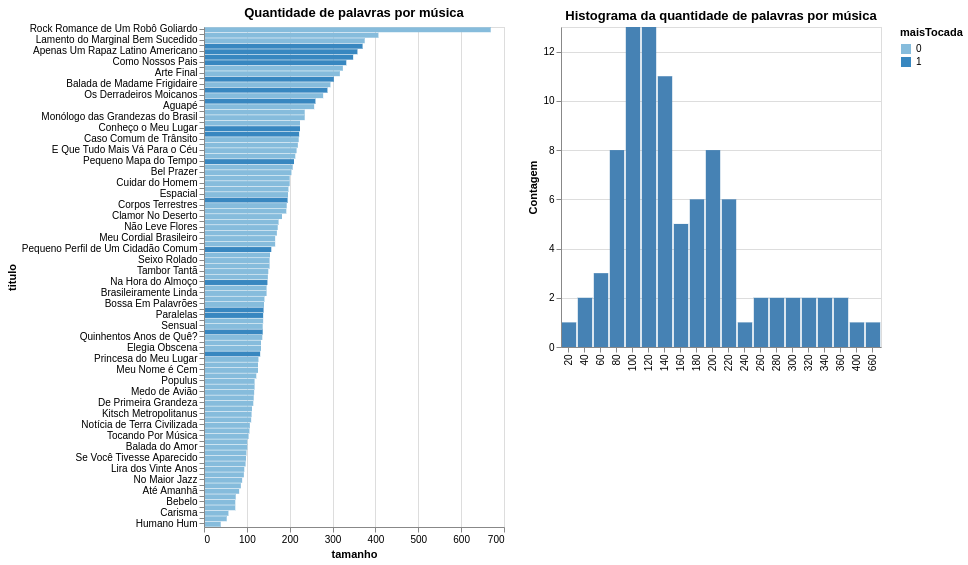

In [187]:
pts = alt.selection(type="interval", encodings=["x"])

rowbars = alt.Chart(df).mark_bar().encode(
    x='tamanho:Q',
    y= alt.Y('titulo:O', sort = alt.EncodingSortField(field="tamanho", order='descending')),   
    color = 'maisTocada:O',
    tooltip=['titulo', 'tamanho', 'keywords']
).transform_filter(
    pts
).properties(    
    height=500,
    width = 300,
    title = 'Quantidade de palavras por música'
)


hist = alt.Chart(df).mark_bar().encode(
    x = alt.X('mbin:N',title=None),
    y = alt.Y('count()',title='Contagem'),
    color = alt.condition(pts, alt.value("steelblue"), alt.value("lightgray"))
).properties(
    height = 320,
    width = 320,
    title = 'Histograma da quantidade de palavras por música'
).add_selection(pts)

hconcat = alt.hconcat(
    rowbars,
    hist,
    data=df
).transform_bin(
    "mbin",
    field="tamanho",
    bin=alt.Bin(maxbins=50)
)

hconcat.save('1_tamanho_musicas.html')
hconcat





# Termos mais frequentes

In [188]:
df_freq = pd.read_csv('belchior_dist_freq.csv')
df_freq = df_freq.sort_values(by='frequencia',ascending=False)
df_freq.head()

,termo,frequencia,musicas
113,nada,79,"Aguapé, Apenas Um Rapaz Latino Americano, Arte..."
222,amor,77,"Alucinação, Amor de Perdição, Amor e Crime, At..."
223,vida,73,"Alucinação, Apenas Um Rapaz Latino Americano, ..."
287,tudo,68,"Amor e Crime, Apenas Um Rapaz Latino Americano..."
39,quero,61,"A Palo Seco, Balada do Amor, Bel Prazer, Brinc..."


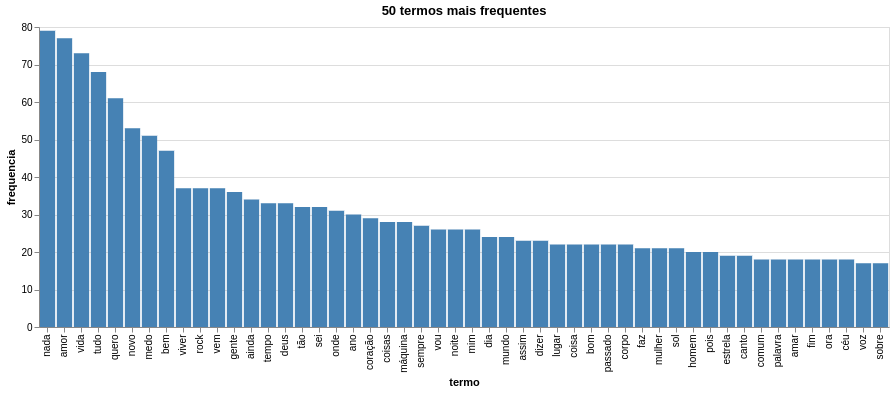

In [189]:
df_freq50 = df_freq[0:50]

wordfreq = alt.Chart(df_freq50).mark_bar().encode(
    y='frequencia:Q',
    x= alt.X('termo:O', sort = alt.EncodingSortField(field="frequencia", order='descending')),
    color = alt.value('steelblue'),
    tooltip=[
        'termo:O',
        'frequencia:Q',
        alt.Tooltip('musicas:O', title='Letras onde o termo ocorre')
    ]
).properties(    
    height=300,
    width = 850,
    title = '50 termos mais frequentes'
)

wordfreq.save('2_frequencia termos.html')
wordfreq

# Similaridade entre músicas

Uma técnica bastante utilizada em processamento de linguagem natural é o cáculo do [TF-IDF](https://pt.wikipedia.org/wiki/Tf%E2%80%93idf). O valor tf–idf (abreviação do inglês *term frequency–inverse document frequency*), é uma medida estatística que tem o intuito de indicar a importância de uma palavra de um documento em relação a uma coleção de documentos ou em um corpus linguístico. Através desse cálculo pode-se vetorizar um documento em um espaço n-dimensional, onde n é o tamanho do vocabulário. Assim cada indice dos vetores represanta um signo linguístico do vocabulário, e o seu valor é o tf-idf daquele termo naquele documento. Vetorizando os documentos, pode-se comparar quais são mais similares. Uma métrica básica bastante utilizada é a [distância cosseno](https://en.wikipedia.org/wiki/Cosine_similarity)

In [190]:
df_sim = pd.read_csv('belchior_similaridade.csv')

In [191]:
source = df_sim.melt(id_vars=['titulo'])

In [192]:
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

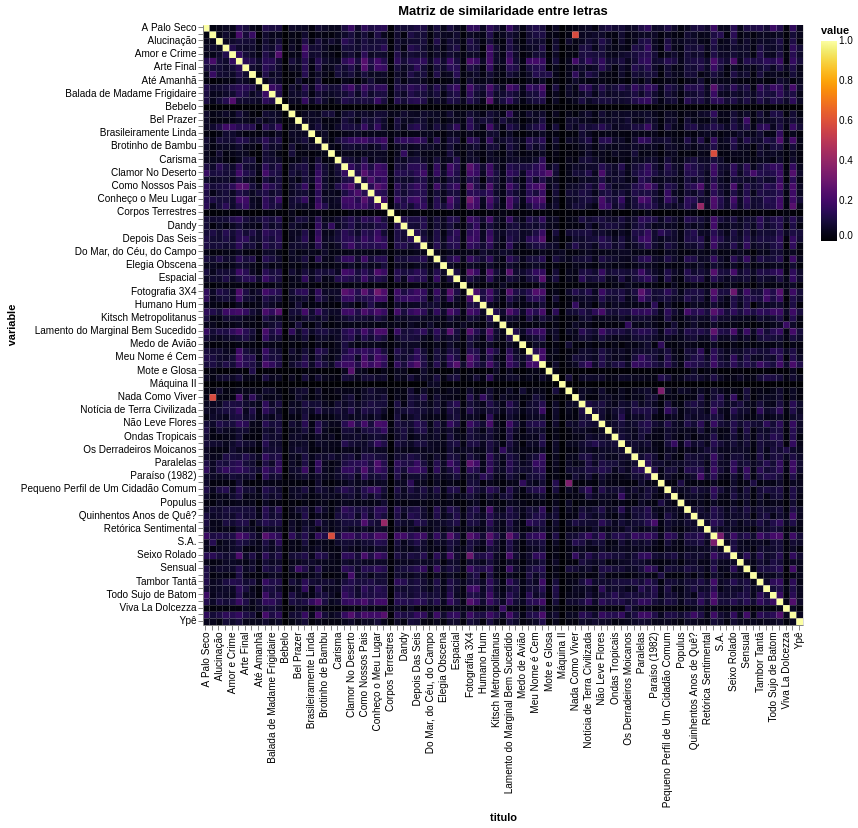

In [193]:
matrix_sim = alt.Chart(source).mark_rect().encode(
    x='titulo:O',
    y='variable:O',
    color=alt.Color('value:Q', scale=alt.Scale(scheme="inferno")),
    tooltip=[
        alt.Tooltip('variable:O', title='Letra A'),
        alt.Tooltip('titulo:O', title='Letra B'),
        alt.Tooltip('value:Q', title='Similaridade'),
    ]
).properties(    
    width = 600,
    height= 600,    
    title = 'Matriz de similaridade entre letras'
)
matrix_sim.save('4_similaridade_musicas.html')
matrix_sim

# Análise de Sentimentos

Esta análise foi realizada utilizando a biblioteca [TextBlob](https://textblob.readthedocs.io/en/dev/). Através de um algoritimo de regressão supervisionado, treinado previamente, dado um texto como entrada a biblioteca estima um valor real para polaridade, em uma escala de -1 (mais negativo) a 1 (mais positivo) e subjetividade em uma escala que varia de 0 (totalmente objetivo), até 1 (totalmente subjetivo). Entretanto, o modelo foi treinado em inglês. Portanto, foi feita uma tradução de cada letra para este idioma, utilizando a mesma biblioteca, para então ser realizada a análise de sentimento. É necessário considerar as limitações dessa abordagem. Primeiro, em algumas composições Belchior explora o uso de linguagem abstratas, com fonemas que não são reconhecidos pelo vocabulário. Além disso, não é muito claro na documentação do TextBlob o significado das escalas de subjetividade e polaridade. Por último, não sabe-se com exatidão o efeito da tradução na análise de sentimento. Nas palavras de Robert Frost, "poesia é o que se perde na tradução". Apesar de tudo, essa técnica permitiu uma exploração interessante do conjunto da obra do compositor e pode ser um passo inicial para análises mais aprofundadas. 

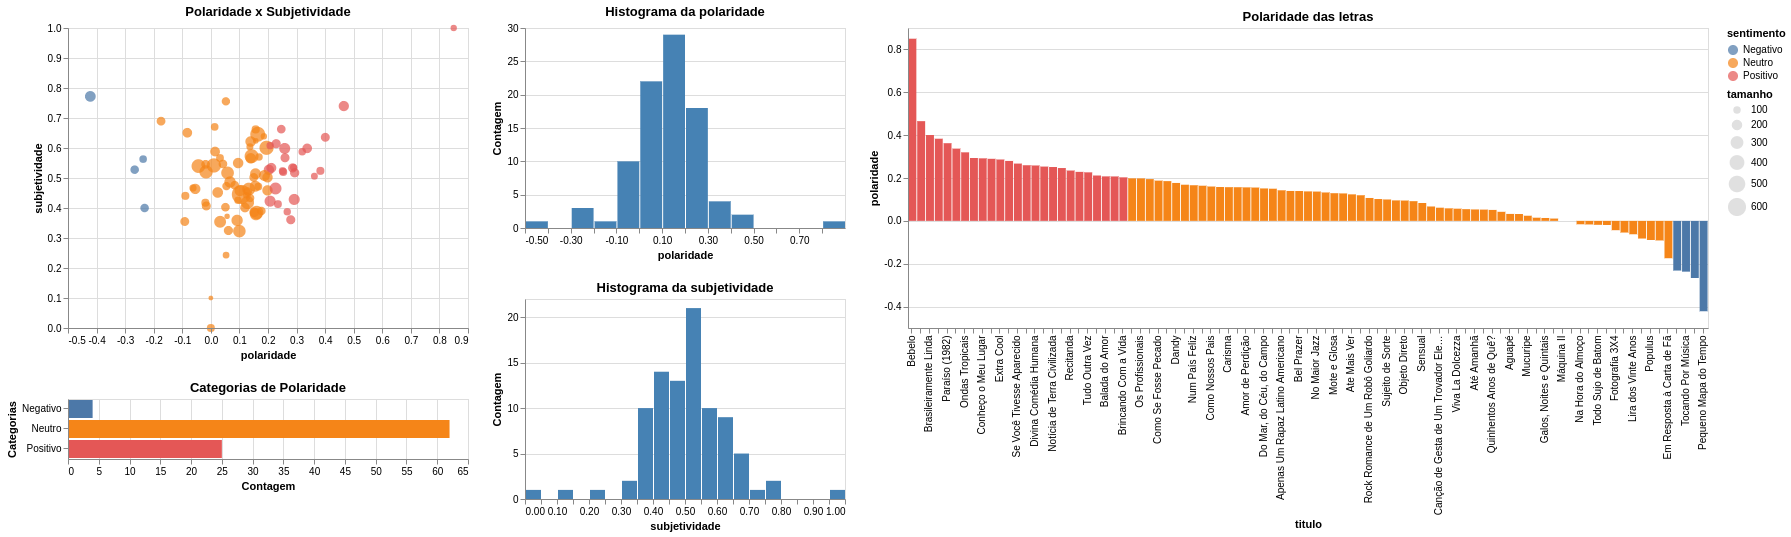

In [194]:
brush = alt.selection(type='interval')

pts = alt.selection(type="interval", encodings=["x"])

points = alt.Chart(df).mark_circle().encode(
    x='polaridade:Q',
    y='subjetividade:Q',
    color=alt.condition(brush, 'sentimento:N', alt.value('lightgray')),
    tooltip=['titulo','polaridade','subjetividade'],
    size='tamanho:Q'
).properties(    
    title = 'Polaridade x Subjetividade'
).add_selection(
    brush
).transform_filter(
    pts
)

bars = alt.Chart(df).mark_bar().encode(
    y=alt.Y('sentimento:N', title = 'Categorias'),
    color='sentimento:N',
    x=alt.X('count(sentimento):Q', title = 'Contagem')
).properties(    
    title = 'Categorias de Polaridade'
).transform_filter(
    brush
)

hist_pol = alt.Chart(df).mark_bar().encode(
    x = alt.X("polaridade:Q", bin=alt.Bin(maxbins=25),title = 'polaridade'),
    y =alt.Y('count()',title='Contagem'),
    color = alt.condition(pts, alt.value("steelblue"), alt.value("lightgray"))
).properties(    
    width = 320,
    height = 200,
    title = 'Histograma da polaridade'
).add_selection(pts)


hist_sub = alt.Chart(df).mark_bar().encode(
    x = alt.X("subjetividade:Q", bin=alt.Bin(maxbins=25),title = 'subjetividade'),
    y =alt.Y('count()',title = 'Contagem'),
    color = alt.condition(pts, alt.value("steelblue"), alt.value("lightgray"))
).properties(    
    width = 320,
    height = 200,
    title = 'Histograma da subjetividade'
).add_selection(pts)

sent = alt.hconcat(
    points & bars,
    hist_pol & hist_sub,
    data=df
)

pol = alt.Chart(df).mark_bar().encode(
    y="polaridade:Q",
    x= alt.X("titulo:O", sort = alt.EncodingSortField(field="polaridade", order='descending')),
    tooltip = ['titulo','polaridade'],
    color= 'sentimento'
).properties(
    width=800,
    height = 300,
    title = 'Polaridade das letras'
).transform_filter(
    pts
)

sent = ((points & bars) | (hist_pol & hist_sub)) | pol
sent.save('3_sentimentos.html')
sent